# Classical Mechanics I (PHYS 311)
## Studio 6

*Name:* Connor Haskell

*Date:* 10/4/2024

## Introduction

Today, we're going to learn about *aliasing*. Aliasing is the corruption of a signal, or the incorrect interpretation of a signal due to limited sampling. Since the programming portion of this course is all about numerical methods in physics, this is an important concept. Keep the outcomes of this studio in mind for all of the numerical work we do! We need to make sure that we're coming to correct conclusions in our numerical modeling **and not looking at artificial effects**. Thinking about this meaning and how to communicate the results is what makes this physics and not just programming!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Sampling a sine wave

Start by plotting a sine wave $\sin(2\pi x/T)$ for a period $T=1$. Use a `linspace` between 0 and 10, with 1000 points in between. Let's call this linspace `x_1000`. You should get a nice smooth sine wave with a period of 1.

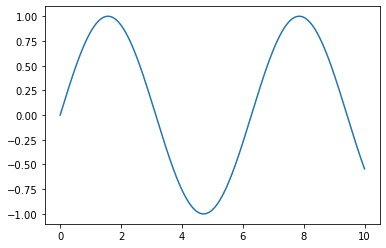

In [2]:
x_1000 = linspace(0,10,1000)

plot(x_1000, sin(x_1000))

Below, let's try to do the same thing. But in addition to that same sine wave, let's plot it again using markers at each point instead of the default line between points. You can hand a `"o"` to the third argument of `plot()` to tell it to use a circle marker. **And instead of plotting it with `x_1000`, let's make a new linspace `x_100` with 100 points between 0 and 10 -- a much coarser sampling!**

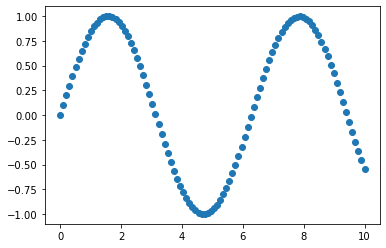

In [3]:
x_100 = linspace(0,10,100)

plot(x_100, sin(x_100), "o")


Things are looking reasonably well represented with 100 points here, but you can see that things are a little less smooth now... Try plotting this 100-sample version on its own with the `"o-"` third option, which will draw a marker at every point and then connect each point with a line.

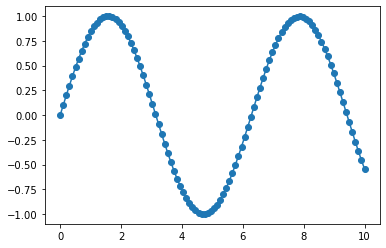

In [4]:
plot(x_100, sin(x_100), "o-")

Notice how it looks mostly the same as the 1000 version but is just a little... pointier.

But now try plotting the same function but with a linspace that only has 25 point in it between 0 and 10. This time, don't draw it with the higher resolution versions. How does that look? Does it still represent the original function well? **Comment on the result**

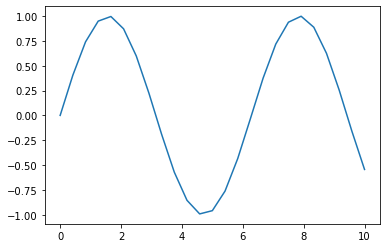

In [5]:
x_25 = linspace(0,10,25)

plot(x_25,sin(x_25))

Let's continue to destroy this function by further under-sampling it! Try out N=20, 16, 13, 12, 11, 10, 5.

(**Loops are your friend! Make your code concise, readable, and not redundant. [DRY](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)**)

For each of them, comment on what the apparent number of cycles you see in this interval between 0 and 10, and what the rough period looks like. Describe what the shapes look like. If you were given these datapoints, would you have enough information to get back to the original underlying function? Use the example markdown table below to present your findings.


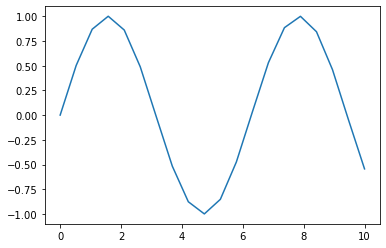

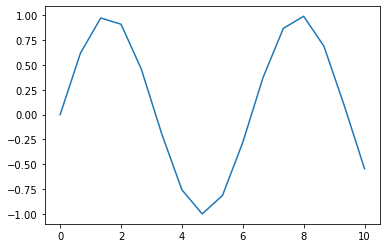

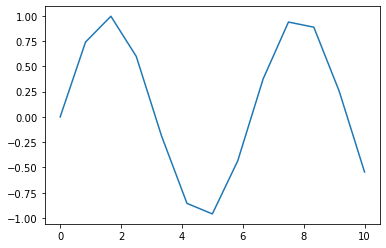

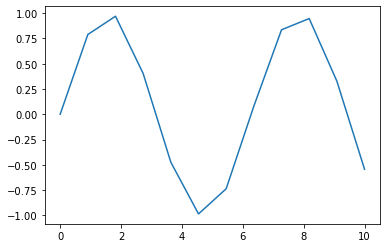

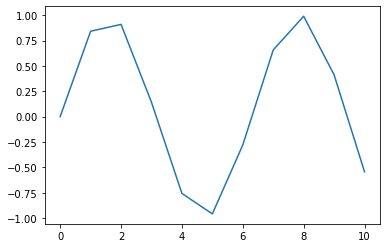

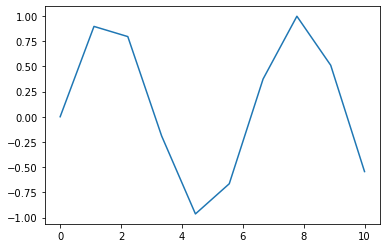

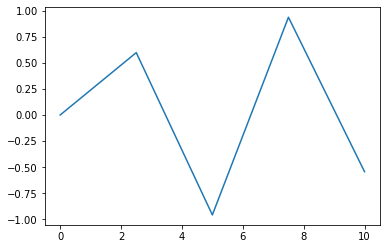

In [6]:
N_values = [20, 16, 13, 12, 11, 10, 5]

for N in N_values:
    x_N = linspace(0,10,N)
    sine_wave_N = sin(x_N)
    figure()
    plot(x_N, sine_wave_N)
    

| N    | Apparent Cycles | Approx Period | Description |
| ---- | --------------- | ------------- | ----------- |
| 100  | 10              | 1             | Ok representation of original fn |
| 25   | 10              | 1             | Really jagged, with a modulation of another period |
| etc  | Fill in your findings |               |             | 

## Nyquist-Shannon Sampling

Ok -- So now we can see that as we sample a function less frequently, we start to get bad and sometimes incredibly misleading interpretations of the function. Let's flip it! Let's see what happens if we have a fixed sampling frequency. What are the limits of what we can hope to represent with that sampling? We'll find this out below.

Let's take that same range of [0,10]. Let's create a linspace with 100 points. We have 100 points per 10 units of x. So the sampling is 10 samplings per 1 unit of x. If x is time and we're measuring in seconds, then this would be a 10 samplings per second, or a 10 Hz sampling frequency. Let's assume from here that we're looking at x as a time and its units are seconds.

**Try to create variables that don't have the same name as elsewhere in the notebook so that they don't clash! Think of these variables as being "global" to the whole notebook. And in general, try to have your variable names be descriptive to make your code more readable.**

In [7]:
t_space = linspace(1,10,100)

Instead of changing the sampling rate, let's now try changing the signal frequency. That will mean reducing the period $T$. Before we had a period $T=1$ s. **What is the frequency in Hz of the sine wave function from the previous section?**

Write a **python** function that will give you the period, given a frequency. You will be able to use this function to help you in the next part.

In [8]:
def period(f):
    return 1/f

Let's start with a sine wave with a frequency of 50 mHz. Plot such a sine wave using the 100 samplings between 0 and 1 that you made above.

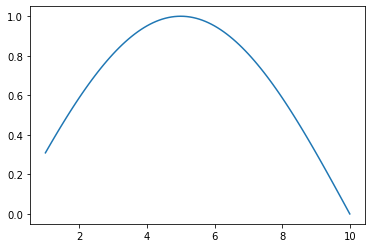

In [9]:
frequency_mHz = 50e-3
period_s = period(frequency_mHz)

sine_wave = sin(2*pi*frequency_mHz*t_space)

plt.plot(t_space, sine_wave)


Now repeat this with the same 10 Hz sampling, but for a sine wave that has a frequency of 100 mHz, 500 mHz, 1 Hz, 5 Hz, 10 Hz.

You should see some pretty shapes, but those aren't sine waves! So the **sampling** has led to a mis-representation of the input sine wave signal.

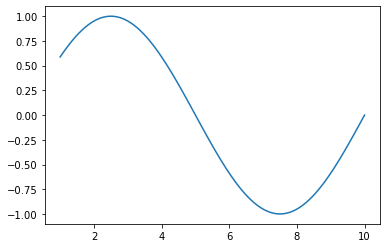

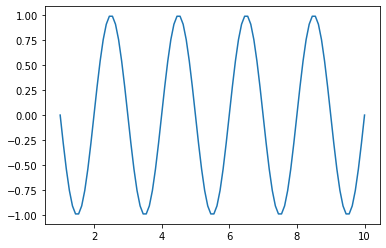

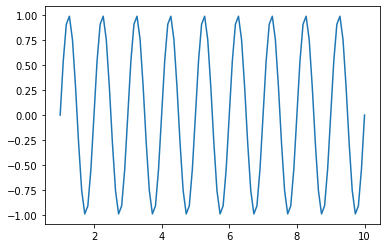

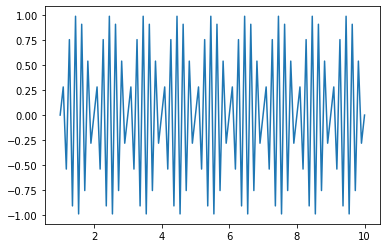

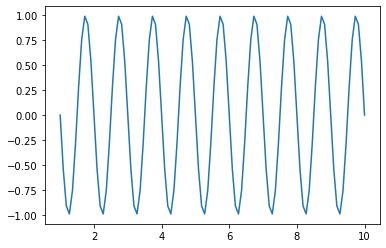

In [10]:
frequencies_mHz = [100, 500, 1000, 5000, 10000]

periods_seconds = [1 / (f * 1e-3) for f in frequencies_mHz]

for i, frequency_mHz in enumerate(frequencies_mHz):
    sine_wave = sin(2 * pi * frequency_mHz * 1e-3 * t_space)
    figure(figsize=(6, 4))
    plot(t_space, sine_wave)

**EC(+0.5): Draw each of these frequencies sine waves but plotted on multiple axes on a single figure, sharing the same x axis. Label everything to communicate your results effectively. You'll want to use the subplots feature of mpl. See https://matplotlib.org/stable/gallery/subplots_axes_and_figures/ganged_plots.html#sphx-glr-gallery-subplots-axes-and-figures-ganged-plots-py for hints.**

What's the highest frequency before you start seeing jagged-ness from the sampling? What's the highest frequency before you see severe distortion of the signal where it looks nothing like what you intended? **Comment on this!**

Repeat the exercise for other signal frequencies. Poke around to find when it no longer gives a reasonable representation of the signal. **Comment on at what frequency it seems we start to have these aliasing problems.**

There is lots to learn about sampling and this is the underpinning of digital music, lots of image processing, high frequency electronics, or just any time we take discrete samples of some signal.

(Look up the Nyquist Frequency and the Nyquist-Shannon Theorem on wikipedia for more info. I'll also post a related video about how digital music works on the canvas module.)

**The important thing to take away from this is that you MUST make sure that when you're doing numerical methods like this, you're sampling enough to represent the underlying function/physics! We'll dive much deeper into this as we start discussing oscillations in a few weeks!**

Please sign below:

I will never under-sample a solution in a physics class and will ask myself if I've captured the correct high-frequency behavior.


X --------------------

(No, you don't really have to sign.)

**EC(+0.5): Import the `signal` package from the `scipy` module. Create a sampling time `linspace` between -5 and 5 at a rate of 0.1 Hz (how many sampling do you expect in this range for that frequency?) and use it to sample the function `signal.gausspulse(t, fc=5, bw=0.2)` (where `t` is whatever you called your linspace) and plot the result. Comment on the result.**

**Then start to increase the sampling rate slowly until you start to see the true behavior of the signal (demonstrate all this by keeping the various plots in this notebook!). At what point does increasing the sampling frequency not reveal any new behavior?**

Undersampling can give misleading results! If you undersample this enough, it looks like this pulse never even happened!